<a href="https://colab.research.google.com/github/Viktory4121/MM/blob/main/%D0%98%D0%94%D0%973.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###ИДЗ 3. Нечёткие модели.
####Вариант 11.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.animation import FuncAnimation
import pylab
%matplotlib inline

In [8]:
#Вид функции: f(t) = (t**3) - 37 * (t**2) + 447 * t - 1755 = (t - 9) * (t - 13) * (t - 15)
def f(t):
  return ((t - 9) * (t - 13) * (t - 15))
#Производная функции f(t)
def df(t):
  return (3 * (t**2) - 74 * t + 447)

Вид функции f(t)



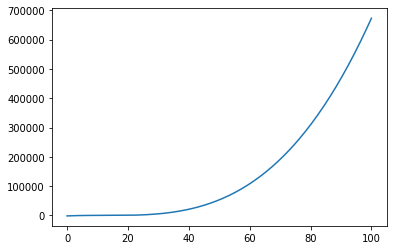

In [15]:
t = np.linspace(0, 100, num = 200)
f_t = f(t)
print('Вид функции f(t)\n')
plt.plot(t, f_t)

Вид производной функции f(t)



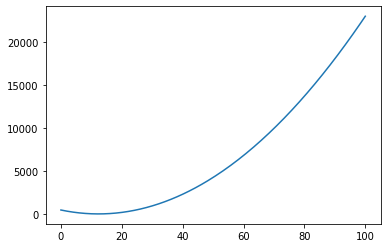

In [16]:
df_t = df(t)
print('Вид производной функции f(t)\n')
plt.plot(t, df_t)

In [23]:
#Нахождение уравнения касательной.
#Для примера возьмём из нашей выборки точку под номером 47 и 122
def finding_tangent_equation(num, t0):
  #формула имеет вид: y = a*t+b, где
  #a = f'(t0); b = f(t0) - t0 * f'(t0)
  a = df(t0)
  b = f(t0) - t0 * df(t0)
  print(str(num) + '-е уравнение касательной имеет вид: y = ' + str(round(a, 4)) + ' * t + (' + str(round(b, 4)) + ')')
  return a, b
a1, b1 = finding_tangent_equation(1, t[47 - 1])
a2, b2 = finding_tangent_equation(2, t[122 - 1])

1-е уравнение касательной имеет вид: y = 339.4371 * t + (-6687.4829)
2-е уравнение касательной имеет вид: y = 7038.8891 * t + (-314561.8272)


In [27]:
#Функция касательных:
def tangent(a, b, t):
  return (a * t + b)
  
y1 = tangent(a1, b1, t)
y2 = tangent(a2, b2, t)